### Question 1:

A survey was conducted to gauge an audience interest in different data science topics, namely:

- Big Data (Spark / Hadoop)
- Data Analysis / Statistics
- Data Journalism
- Data Visualization
- Deep Learning
- Machine Learning

The participants had three options for each topic: **Very Interested, Somewhat interested, and Not interested**. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: https://cocl.us/datascience_survey_data.

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

Use the pandas **read_csv** method to read the csv file into a pandas dataframe, that looks like the following:
![alt text](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/zZTfddhxEeisEhKURr0pTg_dd2d58abb47ce1fda0f1a1ccc29df9ca_Topic_Survey_Question.png?expiry=1583884800000&hmac=Z55t0Rh-0vNKqh2sUTxm3lLwLNj7X2tFjJzMAuhrnwM "Data Science Survey")

In order to read the data into a dataframe like the above, one way to do that is to use the index_col parameter in order to load the first column as the index of the dataframe. Here is the documentation on the pandas read_csv method: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Once you have succeeded in creating the above dataframe, please upload a screen

In [48]:

import types
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

client_credent = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TNZ2LjASX-GPrh-Gp-p22UvAPO-qxlb1gS4RQPchrVA5',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')
bucket_name = 'dsprojectdatavisualization-donotdelete-pr-rvbeebajggw1my'


In [49]:
body = client_credent.get_object(Bucket= bucket_name, Key='Topic_Survey_Assignment.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body, index_col=0)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


### Question 2:

Use the artist layer of Matplotlib to replicate the bar chart below to visualize the **percentage** of the respondents' interest in the different data science topics surveyed.
![alt text](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/_sOFz1VjEeiOFxKmNjWWlA_b6128d40f6727aefb40724091be686b7_Bar_Chart_Masked.png?expiry=1583884800000&hmac=0VAdGgg4eMdUfTTQlmcMd18drWF7IERzkEpG2sM3Ifo "Respondents' interest")

To create this bar chart, you can follow the following steps:

1. Sort the dataframe in descending order of **Very interested**.
2. Convert the numbers into percentages of the total number of respondents. Recall that **2,233** respondents completed the survey. Round percentages to 2 decimal places.
3. As for the chart:
- - use a figure size of (20, 8),
- - bar width of 0.8,
- - use color #5cb85c for the **Very interested** bars, color #5bc0de for the **Somewhat interested** bars, and color #d9534f for the **Not interested** bars,
- - use font size 14 for the bar labels, percentages, and legend,
- use font size 16 for the title, and,

display the percentages above the bars as shown above, and remove the left, top, and right borders.
Once you are satisfied with your chart, please upload a screenshot of your plot.

In [50]:

df.sort_values(['Very interested'], ascending = False, axis = 0, inplace = True)

total = 2233
#df['Very interested'] = (df['Very interested']/total) * 100
#df['Not interested'] =  (df['Not interested']/total) * 100
#df['Somewhat interested'] = (df['Somewhat interested']/total) * 100
df_perc = df.div(total).round(2)
#df_perc=df.round({'Very interested': 2,'Not interested':2,'Somewhat interested':2})
df_perc                                 




,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.76,0.20,0.03
Machine Learning,0.73,0.21,0.03
Data Visualization,0.60,0.33,0.05
Big Data (Spark / Hadoop),0.60,0.33,0.06
Deep Learning,0.57,0.34,0.06
Data Journalism,0.19,0.48,0.27


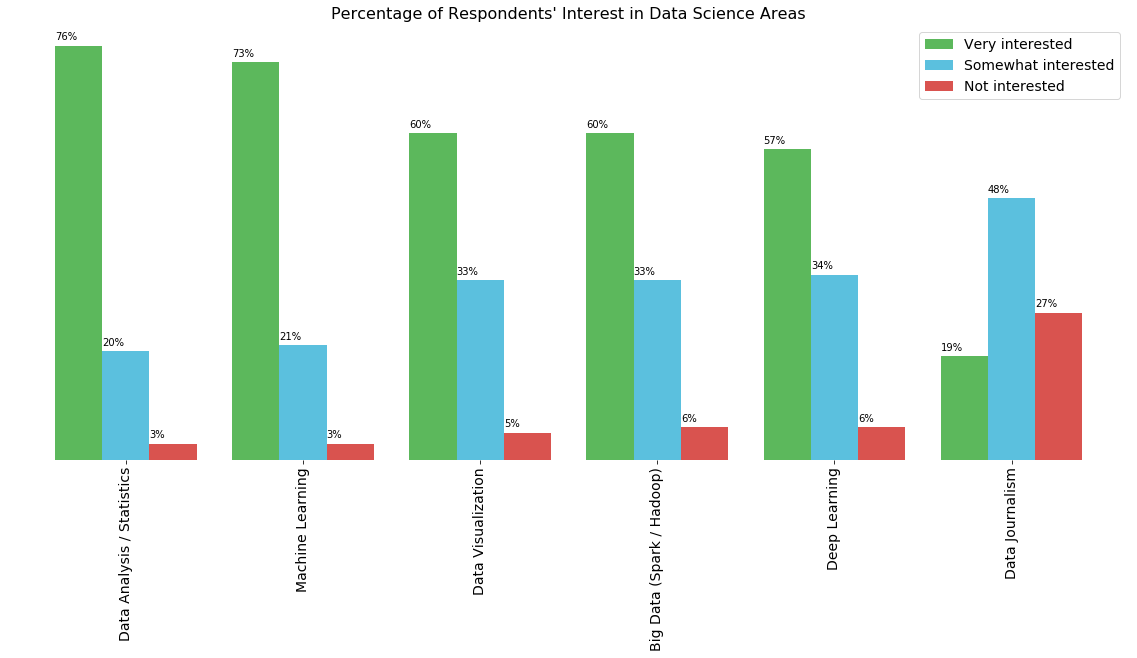

In [51]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = df_perc.plot(kind='bar', figsize=(20,8), width = 0.8, color = colors_list, edgecolor=None)
plt.legend(labels=df_perc.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

### Question 3:

In the final lab, we created a map with markers to explore crime rate in San Francisco, California. In this question, you are required to create a Choropleth map to visualize crime in San Francisco.

Before you are ready to start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes.

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:

- Central,
- Southern,
- Bayview,
- Mission,
- Park,
- Richmond,
- Ingleside,
- Taraval,
- Northern, and,
- Tenderloin.



Convert the San Francisco dataset, which you can also find here, https://cocl.us/sanfran_crime_dataset, into a pandas dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.
![alt text](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/UcAIVlVkEeiDhgqYR-Lxvg_94c477dfeb3935cccb0b468f5c9ba46b_crime_dataset_masked.png?expiry=1583884800000&hmac=TgHa__uvosywZVl_Bs3ZUHOIkAfSdopkod1NEMlkAsE "Respondents' interest")
Once you are happy with your dataframe, upload a screenshot of your pandas dataframe. 

In [52]:

body2 = client_credent.get_object(Bucket='dsprojectdatavisualization-donotdelete-pr-rvbeebajggw1my',Key='Crime_Sanfransisco_2016.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body2, "__iter__"): body2.__iter__ = types.MethodType( __iter__, body2 )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df0 = pd.read_csv(body2, index_col = False)
df0.rename(columns = {'PdDistrict': 'Neighborhood'}, inplace=True)
#df0.head()

In [53]:
# Create the new pandas DataFrame with 2 Columns
df1 = df0.loc[:,['Neighborhood', 'PdId'] ]
#Group Col Neighborhood with Count()
df1 = df1.groupby('Neighborhood').count()
#Rename Col
df1.rename(columns = {'PdId': 'Count'}, inplace=True)
#Sort Count
df1.sort_values(['Count'], ascending = False, axis = 0, inplace = True)
#Change Index key to default
df1.reset_index(inplace=True)
df1

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


### Question 4:

Now you should be ready to proceed with creating the Choropleth map.

As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: https://cocl.us/sanfran_geojson.

For the map, make sure that:

- it is centred around San Francisco,
- you use a zoom level of 12,
- you use fill_color = 'YlOrRd',
- you define fill_opacity = 0.7,
- you define line_opacity=0.2, and,
- you define a legend and use the default threshold scale.

If you follow the lab on Choropleth maps and use the GeoJSON correctly, you should be able to generate the following map:
![alt text](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/okW9uVVkEeiDhgqYR-Lxvg_9e78dcfa79cdc9d18d31ac51173865db_sanfran_map_masked.png?expiry=1583884800000&hmac=T9iMLi7dP8WyDfR2bE8Jh7ouU6wjSN6gqJ-pDoUwFfE "boundaries of the different neighborhoods in San Francisco")

In [3]:
!conda install -c conda-forge folium
import folium




Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    folium-0.10.1              |             py_0          59 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    branca:          0.4.0-py_0        conda-forge
    folium:          

In [180]:
#https://stackoverflow.com/questions/50002498/how-do-i-load-data-from-a-streamingbody-object-using-insert-to-code-to-pandas-in/50002499#50002499
#https://www.ibm.com/support/pages/how-read-file-notebook-cloud-object-storage
import numpy as np
import io
import json
from io import BytesIO

streaming_body = client_credent.get_object(Bucket=bucket_name, Key='sanfrancisco_map.geojson')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body, "__iter__"): streaming_body.__iter__ = types.MethodType( __iter__, streaming_body ) 
    
print(folium.__version__)

0.10.1


In [181]:
readrawdata = streaming_body.read()
#sf_map = folium.Map(location = [37.77, -122.42], zoom_start=12)

geodata = json.load(BytesIO(readrawdata))
#sf_geo = r'geodata'
#sf_geo = r'sanfrancisco_map.geojson'
sf_geo = 'https://cocl.us/sanfran_geojson'
sf_geo

'geodata'

In [182]:
threshold_scale = np.linspace(df1['Count'].min(), df1['Count'].max(), 6, dtype=int)
threshold_scale = threshold_scale.tolist()

In [184]:
#https://github.com/python-visualization/folium/blob/master/examples/GeoJSON_and_choropleth.ipynb


folium.Choropleth(location = [37.77, -122.42] ,
        geo_data = sf_geo,
        #geo_data = json.load(BytesIO(readrawdata)) ,
        data = df1 ,
        columns = ['Neighborhood', 'Count'] ,
        key_on = 'Feature.properties.DISTRICT' ,
        fill_color = 'YlOrRd' ,
        fill_opacity = 0.7 ,
        line_opacity = 0.2 ,       
        legend_name = 'Crime Rate in San Fransisco'        
).add_to(sf_map)


## Method choropleth deprecaded, use class like above instead

sf_map

FileNotFoundError: [Errno 2] No such file or directory: 'geodata'